In [2]:
# Imports necesarios
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

In [15]:
# Carga el conjunto de datos desde un archivo CSV
data = pd.read_csv('drive/MyDrive/diabetes/Diabetes Dataset.csv')

In [16]:
# Definir las características (X) y las etiquetas (y)
X = data.drop(columns=['Class variable (0 or 1)'])
y = data['Class variable (0 or 1)']

In [17]:
# Estandarizar los datos
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

In [18]:
# Divide el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=42, stratify=y)

In [19]:
# Entrenar regresión logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [20]:
# Calcular y_pred
y_pred = logreg.predict(X_test)

In [21]:
# Calcular la precisión en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.7445887445887446


In [22]:
# Mostrar el informe de clasificación en el conjunto de prueba
print("Informe de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_pred))

Informe de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.52      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.74       231



In [23]:
# Calcular y mostrar la matriz de confusión en el conjunto de prueba
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión en el conjunto de prueba:")
print(confusion)

Matriz de Confusión en el conjunto de prueba:
[[130  20]
 [ 39  42]]


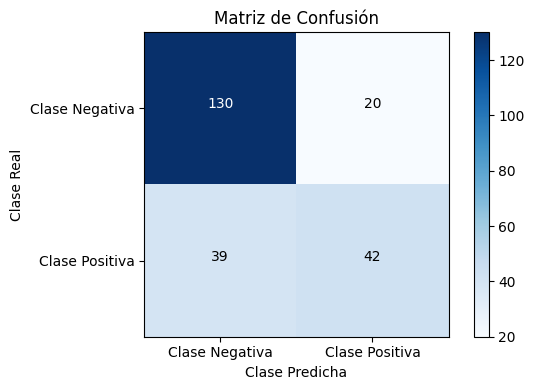

In [24]:
# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(6, 4))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.colorbar()

class_labels = ["Clase Negativa", "Clase Positiva"]
tick_marks = range(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(confusion[i][j]), horizontalalignment="center", color="white" if confusion[i][j] > confusion.max() / 2 else "black")

plt.xlabel("Clase Predicha")
plt.ylabel("Clase Real")

plt.tight_layout()
plt.show()